# Kvant 1 simuleringsopgave

Af Jonas Peter Hyatt, d. 13-02-2018

Jeg vil opfordre læseren til at kigge på opgaven som en helhed, dette gøres nemt da den er skrevet som en jupyter notebook. Det betyder koden jeg benytter og beskriver er sammen med figurerne og teksten, jeg føler dette giver en bedre kontekst til det arbejde jeg har lavet. Den fulde notebook kan findes på følgende link: 

## Dimensionsanalyse

Vi tager udgangspunkt i potentialet for den harmoniske oscillator:

$V(x) = \frac{1}{2} m \omega^2 x^2$

Med den karakteristiske længde:

$x_0 = \sqrt{\frac{\hbar}{m \omega}}$ $\Rightarrow \tilde{x} = \frac{x}{x_0}$

Nu kan vi se nærmere på bølgefunktionen:

$\tilde{\psi} (\tilde{x}) = \psi(x_0 \tilde{x})$

Den afledte mht. x af bølgefunktionen kan regne vha. kædereglen:

$\frac{d}{dx} \psi(x) = \frac{d}{dx} \tilde{\psi}(\frac{x}{x_0}) = \frac{d \tilde{x}}{dx} \frac{d}{d\tilde{x}} \tilde{\psi}(\tilde{x}) = \frac{1}{x_0} \frac{d}{d\tilde{x}} \tilde{\psi}(\tilde{x})$

Vi kan nu se nærmere på den kinetiske energi af dette system:

$- \frac{\hbar^2}{2 m} \frac{d^2}{dx^2} \psi(x) = - \frac{\hbar^2}{2 m x_0^2} \frac{d^2}{d \tilde{x}^2} \tilde{\psi}(\tilde{x})$

Dette giver os en karakteristisk energi:

$E_0 = \frac{\hbar^2}{m x_0^2}$ $\Rightarrow \tilde{E} = \frac{E}{E_0}$

Nu kan vi opskrive potentialet i enheder af den karakteristiske energi:

$\tilde{V}(\tilde{x}) = \frac{V(\tilde{x} x_0)}{E_0} = \frac{m x_0^2}{\hbar^2} \frac{m \omega^2}{2}(\tilde{x} x_0)^2 = \frac{m^2 \omega^2 x_0^4}{2 \hbar} \tilde{x}^2 = \frac{1}{2} \tilde{x}^2$

Og til sidst kan vi benytte løsningen til den harmoniske oscillator fundet i griffiths (2.61):

$\tilde{E}_n = \frac{E_n}{E_0} = (n + \frac{1}{2}) \frac{\hbar \omega}{\frac{\hbar^2}{m x_0^2}} = n + \frac{1}{2}$

In [16]:
# Vi skal bruge nogle pakker til denne simulering.
# Vælg at plotte inline i denne jupyter notebook
import matplotlib
%matplotlib inline

import math # Vi skal bruge noget matematik
import numpy as np # Numpy giver os matricer a la matlab
from numpy import transpose as t
from numpy import append as a
from numpy import zeros, eye
from numpy import linalg as LA # Dette giver os linalg
import matplotlib.pyplot as plt # Pyplot giver os plotting værktøjer
from functools import partial
from scipy.optimize import curve_fit

plt.rc('savefig', dpi=300)
plt.rc('figure', figsize=(12, 6))
plt.rc('font', size=16)
plt.rc('legend', fontsize=20)


In [137]:
# Dimensionsløs potentiale for HO
def potential_HO(x):
    return 1 / 2 * x * x

def potential_gaussian(V_0, x):
    return -V_0 * np.exp(-(x*x))

def pot_gauss_sigma(V_0, sigma, x):
    return -V_0 * np.exp(-(x*x) / (sigma*sigma))

def potential_double_well(V_0, x):
    return 0.5 * x * x + V_0 * np.exp(-(x*x))

def potential_periodic(V_0, x):
    return V_0 * np.cos((2 * math.pi) * x)

# Funktion til at beregne egenværdierne og egenvektorerne
def get_eigenvalues(N, L, potential):
    xarr = np.linspace(-L, L, num = N)
    dx = xarr[1] - xarr[0]

    V = np.diag(potential(xarr))

    # Laver her matricen for den kinetiske energi (ligning 18)
    T = -2 * np.eye(N)
    T += a(zeros((N, 1)), eye(N, N-1), 1)
    T += t(a(zeros((N, 1)), eye(N, N-1), 1))
    T *= (-1. / (2. * (dx**2.)))

    H = T + V
    eigenvalues, psi_E = LA.eigh(H)

    return sorted(eigenvalues), psi_E, xarr, dx, H

def get_cn(N, L, potential):
    eigenvalues, psi_E, xarr, dx, H = get_eigenvalues(N, L, potential)
    psi_E

# Plot egentilstande
def plot_eigenstates(E, xarr, dx, ns, ax):
    Es = []
    for n in ns:
        if n < len(E):
            Es.append(E[n])

    ax.plot(ns, Es, 'o')
    #ax.set_yticks(np.linspace(min(Es), max(Es)+1, len(Es) + 1))
    ax.set_xlabel('$n$')
    ax.set_ylabel('$E_{n}$')
    ax.grid()
    
# Plot egenvektorer
def plot_eigenvectors(psi_E, xarr, dx, ns, potential, ax, offset_scaling = 1, offset = 0, scaling = 1):
    for n in ns:
        ax.plot(xarr, offset_scaling * psi_E[:, n] + offset_scaling * (n + 0.5) + offset, label='$n = %i$' % n)
        
    ax.plot(xarr, potential(xarr))

    # Placerer legend lige ved siden af plottet
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_xlabel('$\\tilde{x}$')
    ax.set_ylabel('$\\psi(\\tilde{x})$')
    ax.grid()
    

def plot_probability_density(psi_E, xarr, ax, nrange = 10):
    ns = []
    positions = []
    prob_dens = psi_E*psi_E
    for n in range(0, nrange):
        ns.append(n)
        positions.append(np.abs(xarr[np.argmax(prob_dens[:, n])]))
    
    ax.plot(ns, positions, 'o')
    ax.set_xlabel('$n$')
    ax.set_ylabel('$x_n$')
    ax.grid()
        
def plot_probability_given(psi_E, xarr, X, ax, nrange = 10):
    ns = []
    P_n = []
    prob_dens = psi_E*psi_E
    
    for n in range(0, nrange):
        P = 0
        for idx, x in enumerate(xarr):
            if (x > X):
                P += prob_dens[idx, n]
                
        ns.append(n)
        P_n.append(P)
    
    ax.plot(ns, P_n, 'o', label = '$X = %i$' % X)
    ax.set_xlabel('$n$')
    ax.set_ylabel('$P_n$')
    ax.grid()
    

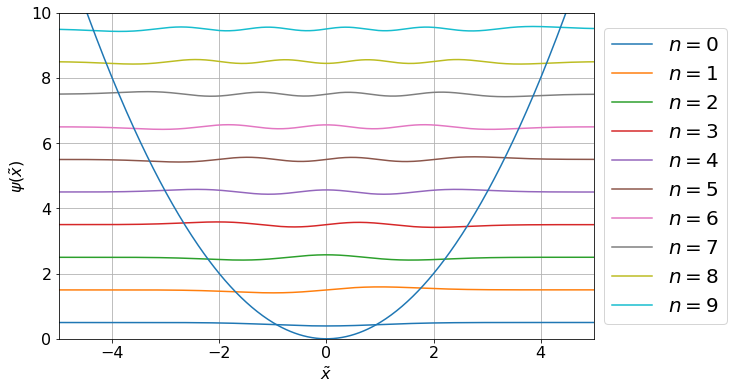

In [115]:
# Plot egenvektorer
fig, ax = plt.subplots()

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, potential_HO)
plot_eigenvectors(psi_E, xarr, dx, list(range(0, 10)), potential_HO, ax)

ax.axis([-5, 5, 0, 10])
plt.show()

# Harmonisk oscillator

## Opgave 1

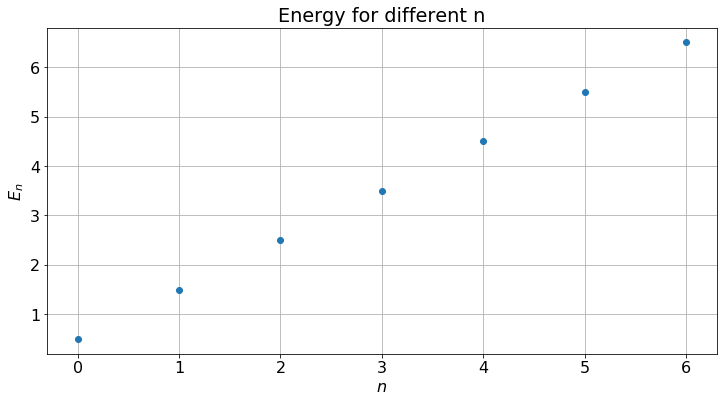

In [116]:
#Plot egenværdier
fig, ax = plt.subplots()

E, psi_E, xarr, dx, H = get_eigenvalues(512, 6, potential_HO)
plot_eigenstates(E, xarr, dx, [0, 1, 2, 3, 4, 5, 6], ax)    

ax.set_title('Energy for different n')
plt.show()

For at løse dette har jeg fundet egenværdierne (vha. eig funktionen i numpy) til hamilton operatoren af den harmoniske oscillator, jeg har plottet dem som funktion af hvilken tilstand (n). De fundne energier stemmer overens med det analytiske resultat fra dimensionsanalysen.

## Opgave 2

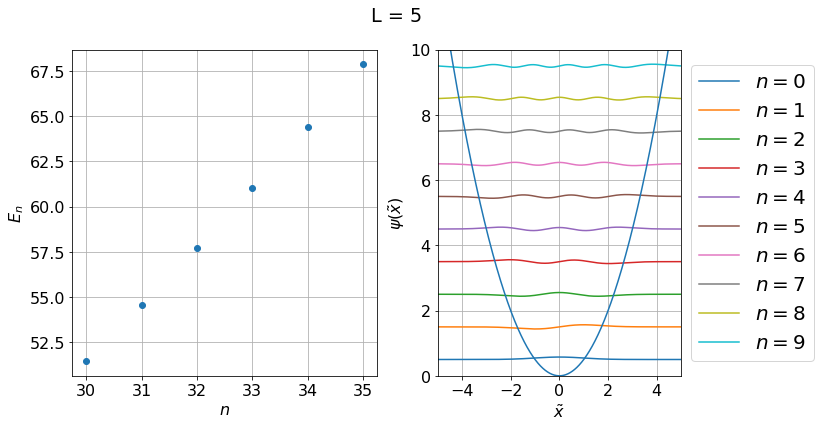

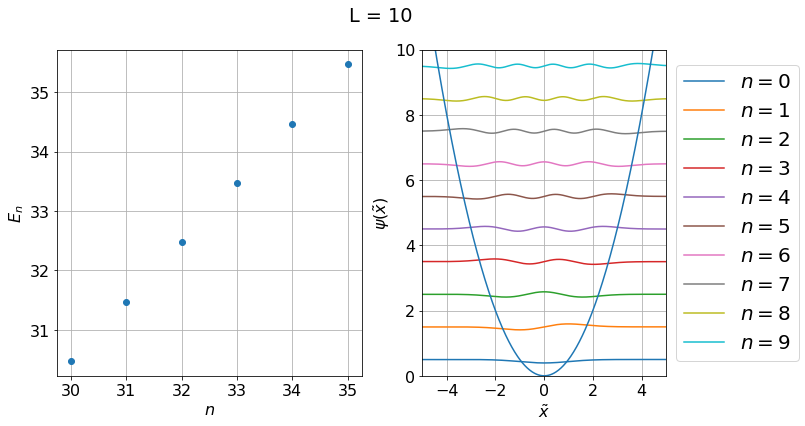

In [117]:
# L = 5
fig, (states_ax, vectors_ax) = plt.subplots(1, 2)

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 5, potential_HO)
ns = list(range(30, 36))
plot_eigenstates(E, xarr, dx, ns, states_ax)
ns = list(range(0, 10))
plot_eigenvectors(psi_E, xarr, dx, ns, potential_HO, vectors_ax)

vectors_ax.axis([-5, 5, 0, 10])
plt.suptitle('L = 5')
plt.show()

# L = 10
fig, (states_ax, vectors_ax) = plt.subplots(1, 2)

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, potential_HO)
ns = list(range(30, 36))
plot_eigenstates(E, xarr, dx, ns, states_ax)
ns = list(range(0, 10))
plot_eigenvectors(psi_E, xarr, dx, ns, potential_HO, vectors_ax)

vectors_ax.axis([-5, 5, 0, 10])
plt.suptitle('L = 10')
plt.show()

Igen findes egenværdierne til hamilton operatoren som plottes som funtion af n. Det ses at energierne for $L = 5$ ikke stemmer overens med det analytiske udtryk, men det gør de for $L = 10$ hvilket tyder på at bølgefunktionen ikke er uddød ved $L = 5$ men den derimod er ved $L = 10$.

## Opgave 3

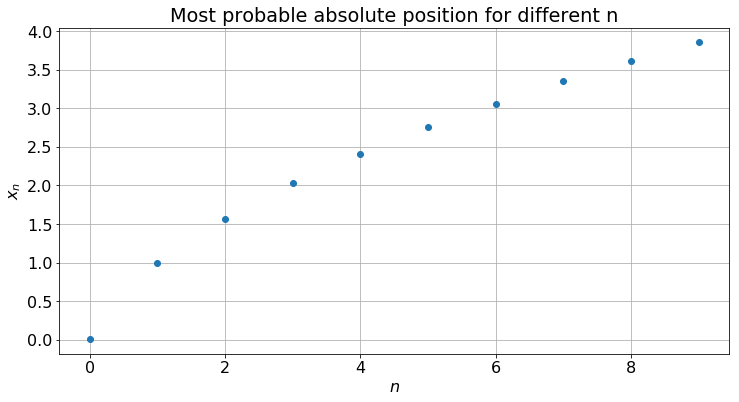

In [118]:
fig, ax = plt.subplots()
E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, potential_HO)
plot_probability_density(psi_E, xarr, ax)
ax.set_title('Most probable absolute position for different n')
plt.show()

Klassisk ville jeg forvente at minimum ville være de mest sansynlige positioner, men det ses at begge ekstremer (minimum og maksimum) er lige sansynlige. Jeg har løst denne opgave ved at se på egenvektorerne til hamilton operatoren, de er plottet i den forgående opgave, jeg har dernæst regnet alle sansynlighederne for forskellige n og til sidst fundet den største som er plottet som funktion af n herover.

## Opgave 4

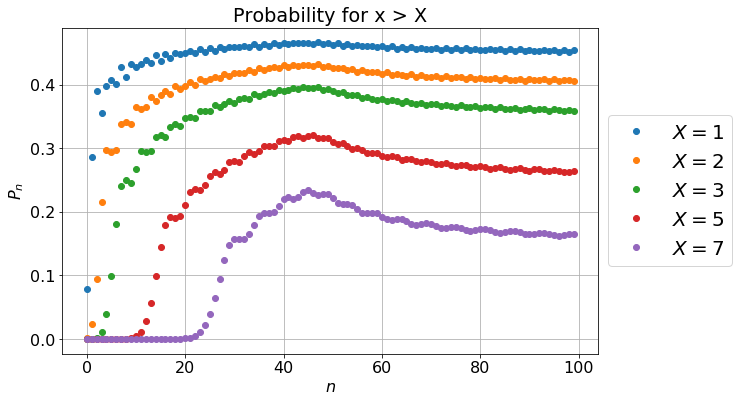

In [40]:
fig, ax = plt.subplots()

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, potential_HO)
for X in [1, 2, 3, 5, 7]:
    plot_probability_given(psi_E, xarr, X, ax, 100)

# Placerer legend lige ved siden af plottet
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Probability for x > X')

plt.show()

Jeg har i denne opgave plottet sansynligheden (summen af absolutkvadraterne givet x>X) som funktion af n. Sandsynligheden er lille for lille n, da energien af partiklen også er lille, og $|x|$ er propertionel med styrken af potentialet. Jeg vil forvente sandsynligheden bliver stor hvor $n = \frac{1}{2}X^2 - \frac{1}{2}$, da det er her systemet klassisk har energi nok til at overkomme potentialet. 

# Gaussian potential

## Opgave 1

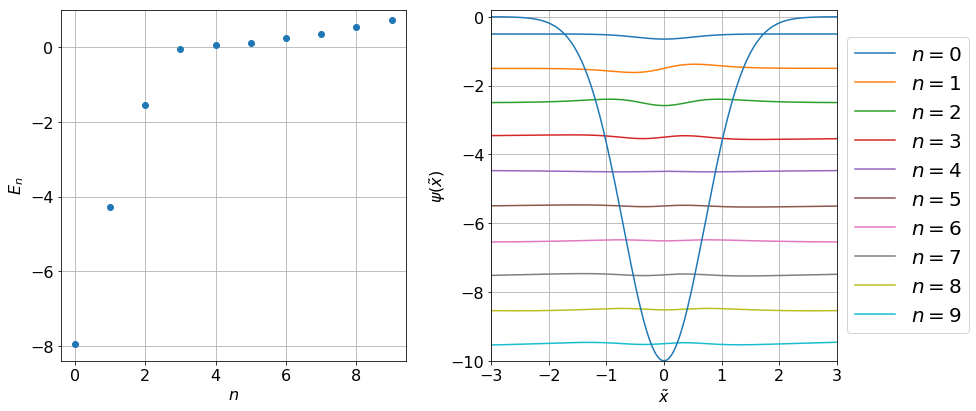

In [120]:
# N = 1000; L = 10; V_0 = 10
fig, (states_ax, vectors_ax) = plt.subplots(1, 2)

pot = partial(potential_gaussian, 10)
ns = list(range(0, 10))

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, pot)

plot_eigenstates(E, xarr, dx, ns, states_ax)
plot_eigenvectors(psi_E, xarr, dx, ns, pot, vectors_ax, -1)

states_ax.axis([-0.4, 9.4, -8.4, 1])
vectors_ax.axis([-3, 3, -10, 0.2])
fig.tight_layout()
plt.show()

Vi ser nogle frie tilstande og nogle bundne tilstande, det stemmer overens med forventninger til det gaussiske potentiale. De frie partiklers energier vil jeg ikke stole på, da vi simulerer for en endelig L, og de bør kunne bevæge sige langt væk fra denne. Jeg har løst denne opgave ved at finde egenværdier og egenvektorer vha. eig præcis som i den harmoniske oscillator.

## Opgave 2

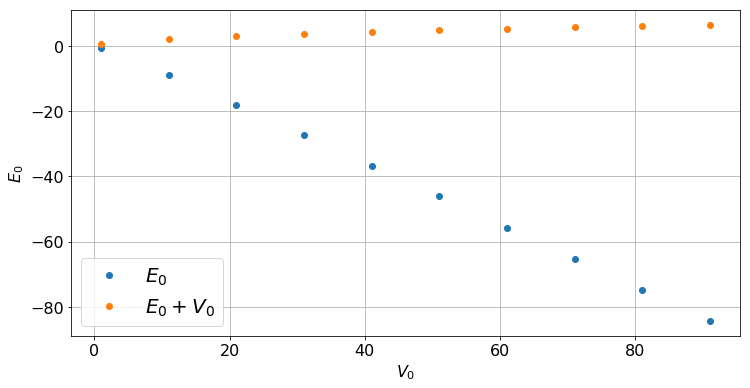

In [158]:
E0s, V0s = [], []
# V_0 = 1 til 100 i trin af 10
for V_0 in range(1, 100, 10):
    pot = partial(potential_gaussian, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, pot)
    E0s.append(E[0])
    V0s.append(V_0)

fig, ax = plt.subplots()
ax.plot(V0s, E0s, 'o', label = '$E_0$')
ax.plot(V0s, np.add(E0s, V0s), 'o', label = '$E_0 + V_0$')
ax.legend()
ax.set_xlabel('$V_0$')
ax.set_ylabel('$E_0$')
ax.grid()

For større $V_0$ forventer vi en mindre $E_0$ da potentialet bliver dybere. Nulpunktsenergien bliver dog langsomt større, så et større potential betyder også en større nulpunktsenergi. Jeg har løst denne opgave ved at finde egenværdierne til hamilton operatoren for adskellige $V_0$, dette har jeg plottet.

## Opgave 3

Start med vores konvertering til enhedsløst:
$\tilde{V_0} = \frac{V_0}{E_0}$, $\tilde{x} = \frac{x}{x_0}$, $E_0 = \frac{\hbar^2}{m x_0^2}$

Taylor udvikling har det gaussiske potentiale omkring 0 til anden orden giver $\tilde{V} = \tilde{V}_0 \tilde{x}^2 - \tilde{V}_0 \Rightarrow V = E_0 \tilde{V}_0 \tilde{x}^2 - V_0$, denne ligner potentialet for den harmoniske oscillator.

Hvis vi indsætter dette i Schrödinger ligningen fås følgende:
$E \psi = - \frac{\hbar^2}{2 m} \frac{d^2}{dx^2} \psi + \frac{E_0 \tilde{V}_0}{x_0^2} x^2 \psi - V_0 \psi \Rightarrow (E + V_0) \psi = - \frac{\hbar^2}{2 m} \frac{d^2}{dx^2} \psi + \frac{E_0 \tilde{V}_0}{x_0^2} x^2 \psi$

Til denne kendes energierne til:
$(E_n + V_0) = (n+\frac{1}{2})\hbar \omega$ $\Rightarrow E_n = (n+\frac{1}{2})\hbar \omega - V_0$

Men da vi regner enhedsløst skal vi lige finde hvad $\hbar \omega$ skal være:
$\frac{E_0 \tilde{V}_0}{x_0^2} = \frac{1}{2} m \omega^2$ $\Rightarrow \frac{2 \hbar E_0 \tilde{V}_0}{x_0^2 m} = 2 E_0^2 \tilde{V}_0 = \hbar^2 \omega^2$ $\Rightarrow \hbar \omega = E_0 \sqrt{2 \tilde{V}_0}$

Dette indsættes: 
$E_n = (n + \frac{1}{2})E_0 \sqrt{2 \tilde{V}_0} - V_0$

Nu kan vi regne energiforskellen:
$E_1 - E_0 = (\frac{3}{2} - \frac{1}{2}) E_0 \sqrt{2 \tilde{V}_0} = E_0 \sqrt{2 \tilde{V}_0}$

Vi skal igen regne om til enhedsløst, dette gøres ved hjælp af $E_0$:

$\frac{E_1 - E_0}{E_0} = \sqrt{2 \tilde{V}_0}$

Nu kan denne plottes sammen med den numeriske løsning (ses nedenfor).

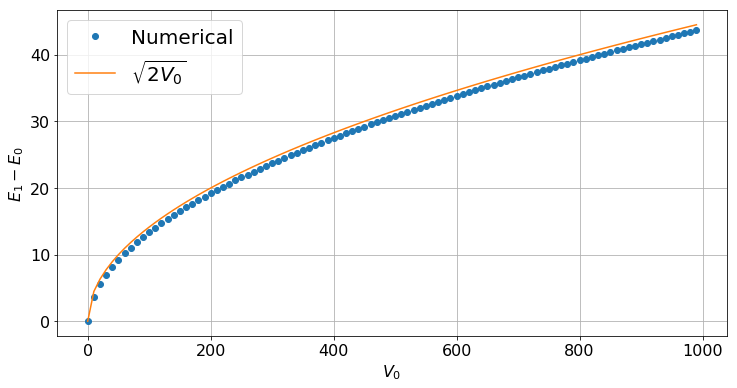

In [147]:
Es, V0s = [], []
# V_0 = 0 til 1000 i trin af 10
for V_0 in range(0, 1000, 10):
    pot = partial(potential_gaussian, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, pot)
    Es.append(E[1] - E[0])
    V0s.append(V_0)
    
fig, (energy_ax) = plt.subplots()

energy_ax.plot(V0s, Es, 'o', label='Numerical')
energy_ax.plot(V0s, np.sqrt(2) * np.sqrt(V0s), label = '$\sqrt{2 V_0}$')
energy_ax.set_xlabel('$V_0$')
energy_ax.set_ylabel('$E_1 - E_0$')
energy_ax.legend()
energy_ax.grid()

Det ses at det analytiske udtryk stemmer meget pænt overens med den numeriske løsning, der er dog en rimeligt konstant forskel mellem de to (omtrent 0.08).

## Opgave 4

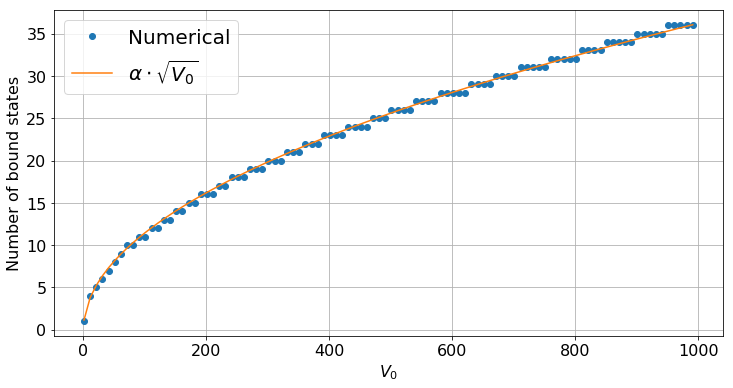

In [148]:
n_states, V0s = [], []
# V_0 = 1 til 1000 i trin af 10
for V_0 in range(1, 1000, 10):
    pot = partial(potential_gaussian, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, pot)

    i = 0
    while E[i] < 0:
        i += 1

    n_states.append(i)
    V0s.append(V_0)

def expected_number_of_states(V_0, alpha):
    return alpha * np.sqrt(V_0)

popt, pcov = curve_fit(expected_number_of_states, V0s, n_states)
factor = popt[0]

fig, ax = plt.subplots()
ax.plot(V0s, n_states, 'o', label='Numerical')
ax.plot(V0s, factor * np.sqrt(V0s), label='$\\alpha \\cdot \\sqrt{V_0}$')
# ax.plot(V0s, V0s / (math.sqrt(2) * np.sqrt(V0s)) - 0.5, label = '')
ax.set_xlabel('$V_0$')
ax.set_ylabel('Number of bound states')
ax.legend()
ax.grid()

For at løse denne opgave har jeg fundet antal bundne tilstande for mange $V_0$, hernæst har jeg fittet $\alpha \sqrt{V_0}$ til denne. Resultatet ses herover, det stemmer meget pænt overens.

## Opgave 5

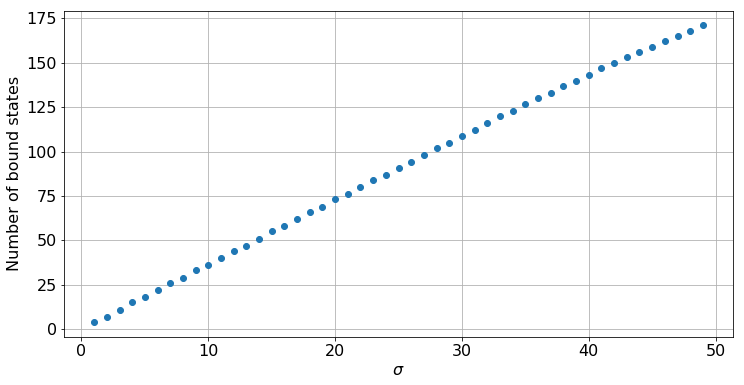

In [60]:
n_states, sigmas = [], []
for sigma in range(1, 50):
    V_0 = 10
    L = 100
    pot = partial(pot_gauss_sigma, V_0, sigma)
    E, psi_E, xarr, dx, H = get_eigenvalues(1000, L, pot)
    
    i = 0
    while E[i] < 0:
        i += 1

    n_states.append(i)
    sigmas.append(sigma)
    
fig, ax = plt.subplots()
ax.plot(sigmas, n_states, 'o')
ax.set_xlabel('$\sigma$')
ax.set_ylabel('Number of bound states')
ax.grid()


Vi ved at antallet af bundne tilstande er proportionelt med $\sqrt{\tilde{V}_0}$, hvis vi ser lidt nærmere på dette fås følgende: $\sqrt{\tilde{V}_0} = \sqrt{\frac{V_0}{E_0}} = \sqrt{V_0 m} \frac{\sigma}{\hbar}$, altså ses det at antallet af bundne tilstande er lineært afhængig af $\sigma$

## Opgave 6

lambda = 1262.03870863 nm


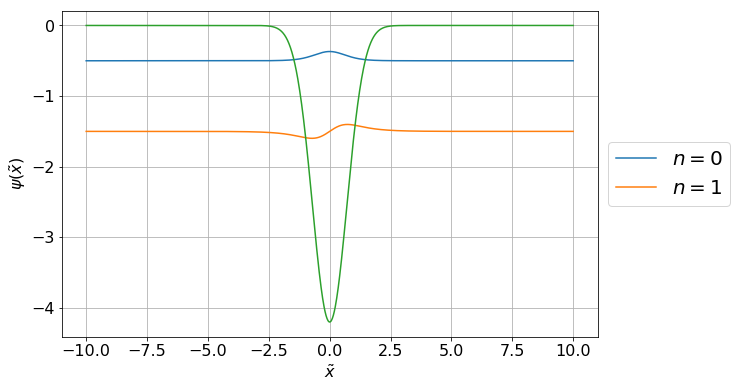

In [81]:
E_0 = 7.630328719e-20 # Joule
V_0_joule = 3.204352924e-19 # Joule
V_0 = V_0_joule / E_0 # enhedsløs
konst_h = 6.62606876e-34 # m^2 kg / s
konst_c = 299792458 # m / s

pot = partial(potential_gaussian, V_0)
fig, ax = plt.subplots()
E, psi_E, xarr, dx, H = get_eigenvalues(1000, 10, pot)
plot_eigenvectors(psi_E, xarr, dx, [0, 1], pot, ax, -1)

dE = E[1] - E[0]
ny = dE * E_0 / konst_h
wavelength = konst_c / ny

print('lambda =', wavelength * 1e9, 'nm')


Først har jeg regnet $E_0 = \frac{\hbar^2}{m_e \sigma^2}$ i joule, hernæst har jeg regnet $V_0$ om til joule. Nu har vi den enhedsløse $\tilde{V}_0 = \frac{V_0}{E_0}$ som vi bruger til at finde egenværdierne til hamilton operatoren. Af egenværdierne findes forskellen mellem grundtilstanden og første eksiterede tilstand, denne regnes om til en bølgelængde (i vakuum) ved $\lambda = \frac{c h}{\delta \tilde{E} \cdot E_0} = 1262 nm$.

# Double well potential

## Opgave 1

[-16.36522335 -16.36520677 -14.04530085 -14.04517187 -11.89568914]


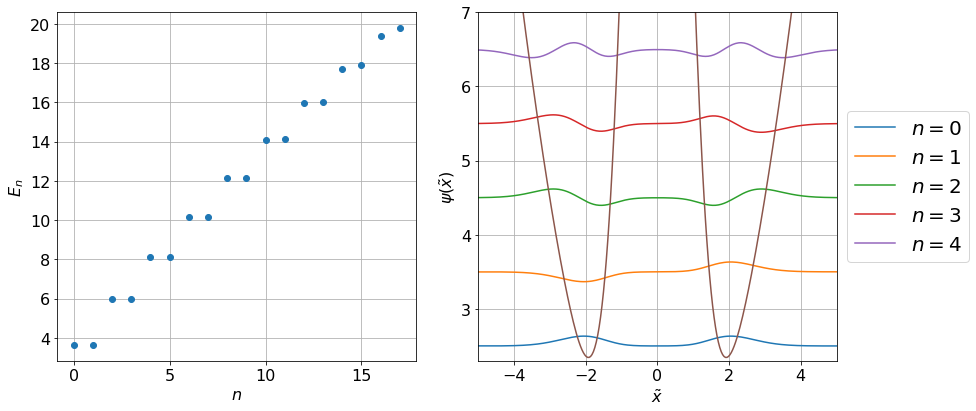

In [168]:
# N = 1000; L = 10; V_0 = 20
fig, (states_ax, vectors_ax) = plt.subplots(1, 2)

V_0 = 20
pot = partial(potential_double_well, V_0)

E, psi_E, xarr, dx, H = get_eigenvalues(1000, 20, pot)

print(np.array(E[:5]) - 20)

ns = list(range(0, 18))
plot_eigenstates(E, xarr, dx, ns, states_ax)
ns = list(range(0, 5))
plot_eigenvectors(psi_E, xarr, dx, ns, pot, vectors_ax, 1, 2)

vectors_ax.axis([-5, 5, 2.3, 7])
fig.tight_layout()
plt.show()

Jeg har plottet egenvektorerne og egenværdierne for de første fem tilstande lige herover, energierne er betydeligt lavere en potentialet i midten. Forskellen er $E_n - 20 = -16.4, -16.4, -14.0, -14.0, -11.9, ...$. 

Det er kvantetunnelering der forbinder de to brønde, der for er der også en sandsynlighed for at partiklen kan findes udenfor potentialet. Bølgefunktionerne ligner dem fra den harmoniske oscillator, men skåret over på midten hvor brøndene er forbundet vha. kvantetunnelering. Derfor ser vi den ene halvdel af funktionen i den ene brønd, og den anden halvdel i den anden brønd, såfremt man tager højde for at sandsynligheden for at være mellem de to er meget lav.

## Opgave 2

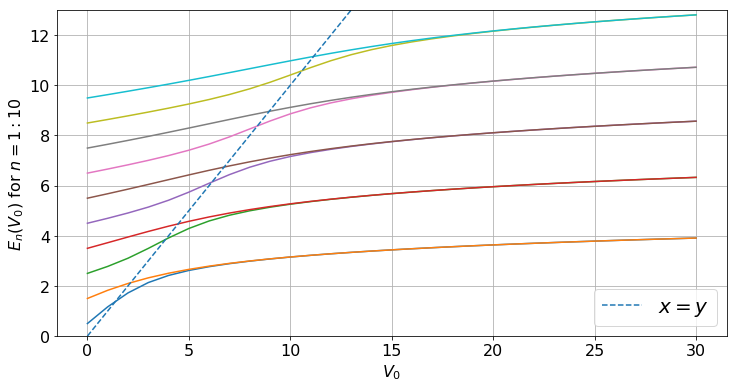

In [146]:
fig, ax = plt.subplots()
V0s = list(range(0, 31))
Es = []
for V_0 in V0s:
    pot = partial(potential_double_well, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(1000, 20, pot)
    Es.append(E[:10])
    
ax.plot(V0s, Es)
ax.plot(V0s, V0s, '--', label = '$x = y$')
ax.legend(loc='lower right')
ax.set_xlabel('$V_0$')
ax.set_ylabel('$E_n(V_0)$ for $n = 1:10$')
ax.set_ylim((0, 13))
ax.grid()

Dybden af brønden, samt partiklens energi, afgør om partiklen ser hvad der ligner en samlet eller en adskilt harmonisk oscillator, overgangen foregår når partiklen har ligesåmeget energi som potentialet.

# Periodic potential

## Opgave 1

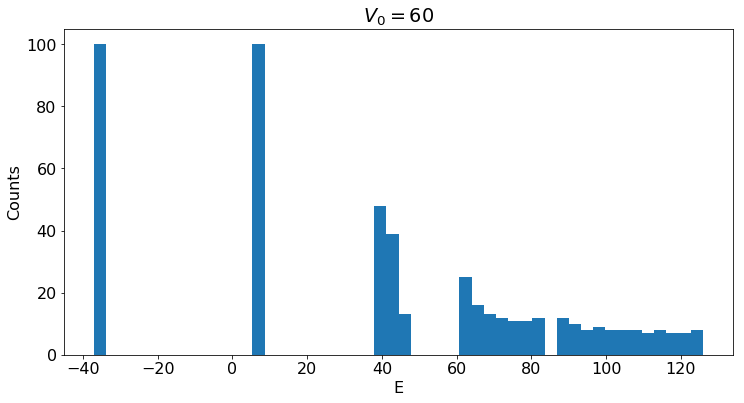

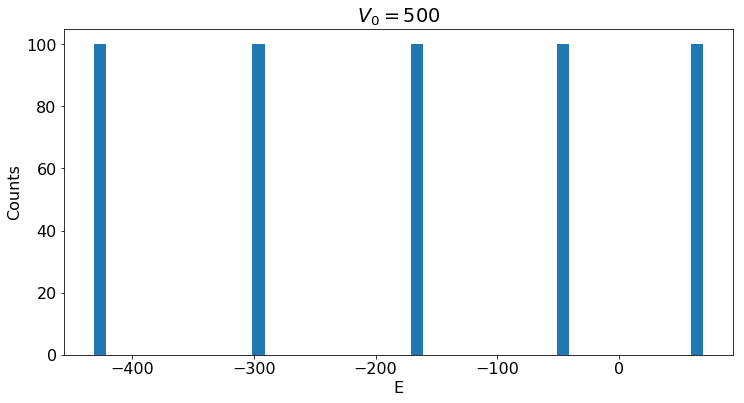

In [130]:
factor = 5
N = factor * 1000
L =  factor * 10
    
for V_0 in [60, 500]:
    pot = partial(potential_periodic, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(N, L, pot)
    fig, ax = plt.subplots()
    ax.hist(E[:(factor * 100)], bins = 50)
    ax.set_xlabel('E')
    ax.set_ylabel('Counts')
    ax.set_title('$V_0 = %i$' % V_0)
    plt.show()

Energi båndene ses tydeligt på figurerne herover, partiklerne bliver fanget i lokale harmoniske oscilatorer.

## Opgave 2

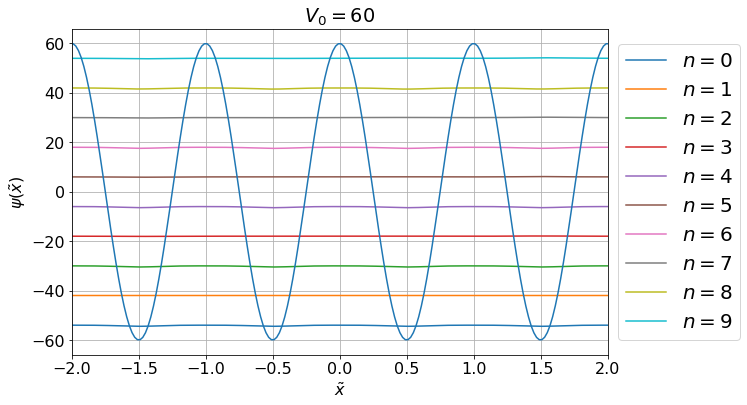

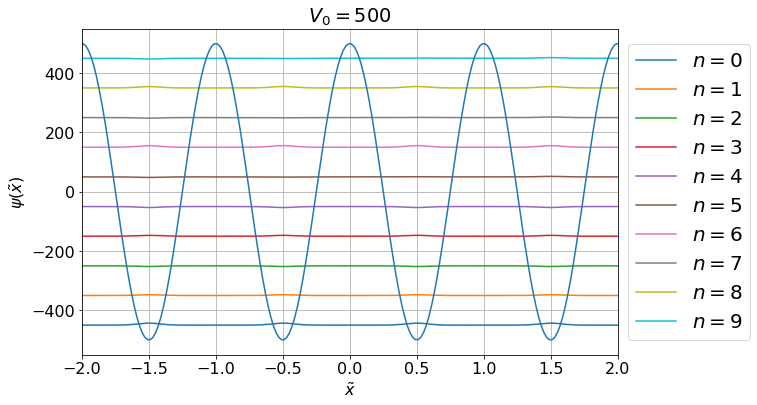

In [149]:
factor = 5
N = factor * 1000
L =  factor * 10
ns = list(range(0, 10))
for V_0 in [60, 500]:
    fig, ax = plt.subplots()
    pot = partial(potential_periodic, V_0)
    E, psi_E, xarr, dx, H = get_eigenvalues(N, L, pot)
    plot_eigenvectors(psi_E, xarr, dx, ns, pot, ax, V_0/5, -V_0)
    ax.set_xlim((-2, 2))
    ax.set_title('$V_0 = %i$' % V_0)
